# 1. Classification

In [2]:
import sys 
import numpy as np
import pandas as pd
import statsmodels as sm
import sklearn
import scipy as sp
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataframe_train.csv")
#get dummies
df = pd.get_dummies(df, columns=['weather_grade','source_type','action_type'],drop_first=False)
df.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,hour,weather_grade_Bad Weather,weather_grade_Normal Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_ASSIGN,source_type_DELIVERY,source_type_PICKUP,action_type_DELIVERY,action_type_PICKUP
0,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,11,0,1,0,0,1,0,0,0,1
1,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,11,0,1,0,0,0,0,1,1,0
2,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,11,0,1,0,0,0,1,0,0,1
3,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,11,0,1,0,0,0,0,1,1,0
4,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,11,0,1,0,0,0,1,0,0,1


In [4]:
#drop baseline
df = df.drop(columns = ['weather_grade_Normal Weather','source_type_ASSIGN','action_type_PICKUP'])
df.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,grid_distance,expected_use_time,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_DELIVERY,source_type_PICKUP,action_type_DELIVERY
0,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,377.0,804,1246,11,0,0,0,0,0,0
1,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,780.0,298,1246,11,0,0,0,0,1,1
2,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,550.0,545,2462,11,0,0,0,1,0,0
3,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,707.0,341,1205,11,0,0,0,0,1,1
4,10007871,0,2.100070e+18,121.630997,39.142343,20200201,2.020020e+16,3,4.751832,11,...,770.0,166,1882,11,0,0,0,1,0,0


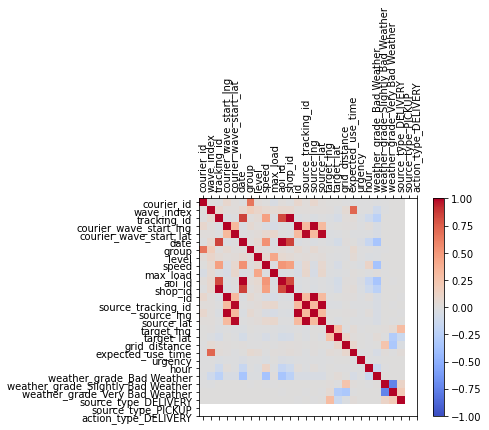

In [228]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [125]:
X = df.drop(columns = ['expected_use_time','action_type_DELIVERY','courier_id', 'wave_index', 'tracking_id', 'group', 'id','aoi_id','shop_id','courier_wave_start_lng', 'courier_wave_start_lat','source_tracking_id','source_lng','source_lat','target_lng','target_lat'])
y = np.array(df['action_type_DELIVERY'])
# Split dataframe_train into training and testing sets.
from sklearn.model_selection import train_test_split as tr_te_split
X_train, X_test, y_train, y_test = tr_te_split(X, y,stratify=y,random_state=666,test_size=0.3)

# 1) Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score
# LR without PCA
lr = LR(C=1,max_iter=10000).fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,lr.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,lr.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.7211
The out-of-sample ROC-AUC is: 0.7197


In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [128]:
from sklearn.linear_model import LogisticRegression as LR

In [129]:
##Without PCA
pca_lr = make_pipeline(StandardScaler(), LR(C=1,max_iter=10000))
pca_lr.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_lr.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_lr.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.8104
The out-of-sample ROC-AUC is: 0.8098


In [131]:
##PCA with n_components=11
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=11), LR(C=1,max_iter=10000))
pca_lr.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_lr.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_lr.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.7304
The out-of-sample ROC-AUC is: 0.7290


In [132]:
##PCA with n_components=10
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=10), LR(C=1,max_iter=10000))
pca_lr.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_lr.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_lr.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.7300
The out-of-sample ROC-AUC is: 0.7284


In [133]:
##PCA with n_components=9
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=9), LR(C=1,max_iter=10000))
pca_lr.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_lr.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_lr.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.7298
The out-of-sample ROC-AUC is: 0.7282


In [134]:
##PCA with n_components=8
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=8), LR(C=1,max_iter=10000))
pca_lr.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_lr.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_lr.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.7298
The out-of-sample ROC-AUC is: 0.7282


As we could see from above, the logistic regression without PCA performs the best. We then apply this model to train the entire training data frame and predict the testing dataframe.

In [135]:
pca_lr = make_pipeline(StandardScaler(), LR(C=1,max_iter=10000))
pca_lr.fit(X, y)
print('The in-sample ROC-AUC of the entire training set is: %0.4f' % roc_auc_score(y,pca_lr.predict_proba(X)[:,1]))

The in-sample ROC-AUC of the entire training set is: 0.8103


# 2) knn

In [136]:
# We first test the baseline knn model without PCA or Clustering
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [138]:
grid_knn_clf = GridSearchCV(KNeighborsClassifier(),[{'n_neighbors':[10,50,100,150,200]}],scoring = 'roc_auc',cv=5)
grid_knn_clf.fit(X_train,y_train)
print("The best n_neighbor is",grid_knn_clf.best_params_)
print("The in-sample ROC-AUC is %0.4f" % grid_knn_clf.best_score_)

The best n_neighbor is {'n_neighbors': 100}
The in-sample ROC-AUC is 0.8055


In [139]:
## PCA with n_components=12
knn_clf = make_pipeline(StandardScaler(), PCA(n_components=12),KNeighborsClassifier(n_neighbors = 100))
knn_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,knn_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,knn_clf.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.8632
The out-of-sample ROC-AUC is: 0.8550


In [140]:
## PCA with n_components=11
knn_clf = make_pipeline(StandardScaler(), PCA(n_components=11),KNeighborsClassifier(n_neighbors = 100))
knn_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,knn_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,knn_clf.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.8622
The out-of-sample ROC-AUC is: 0.8539


In [141]:
## PCA with n_components=10
knn_clf = make_pipeline(StandardScaler(), PCA(n_components=10),KNeighborsClassifier(n_neighbors = 100))
knn_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,knn_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,knn_clf.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.8640
The out-of-sample ROC-AUC is: 0.8561


In [142]:
## PCA with n_components=9
knn_clf = make_pipeline(StandardScaler(), PCA(n_components=9),KNeighborsClassifier(n_neighbors = 100))
knn_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,knn_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,knn_clf.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.8665
The out-of-sample ROC-AUC is: 0.8585


In [143]:
## PCA with n_components=8
knn_clf = make_pipeline(StandardScaler(), PCA(n_components=8),KNeighborsClassifier(n_neighbors = 100))
knn_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,knn_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,knn_clf.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 0.8673
The out-of-sample ROC-AUC is: 0.8595


In [147]:
knn_clf = make_pipeline(StandardScaler(), PCA(n_components=8),KNeighborsClassifier(n_neighbors = 100))
knn_clf.fit(X,y)
print('The in-sample ROC-AUC of the entire training set is: %0.4f' % roc_auc_score(y,knn_clf.predict_proba(X)[:,1]))

The in-sample ROC-AUC of the entire training set is: 0.8678


In [10]:
from sklearn.metrics import roc_auc_score

# 3) Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [15]:
tree_clf =  DecisionTreeClassifier() 
tree_clf.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,tree_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,tree_clf.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7630


In [21]:
##PCA with n_components=12
pca_tree = make_pipeline(PCA(n_components=12), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7613


In [22]:
##PCA with n_components=11
pca_tree = make_pipeline(PCA(n_components=11), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7610


In [23]:
##PCA with n_components=10
pca_tree = make_pipeline(PCA(n_components=10), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7604


In [25]:
##PCA with n_components=9
pca_tree = make_pipeline(PCA(n_components=9), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7614


In [24]:
##PCA with n_components=8
pca_tree = make_pipeline(PCA(n_components=8), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7630


In [26]:
##PCA with n_components=7
pca_tree = make_pipeline(PCA(n_components=7), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7274


In [27]:
##PCA with n_components=6
pca_tree = make_pipeline(PCA(n_components=6), DecisionTreeClassifier())
pca_tree.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_tree.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_tree.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.7266


In [44]:
pca_tree = make_pipeline(PCA(n_components=8), DecisionTreeClassifier())
pca_tree.fit(X, y)
print('The in-sample ROC-AUC of the entire training set is: %0.4f' % roc_auc_score(y,pca_tree.predict_proba(X)[:,1]))

The in-sample ROC-AUC of the entire training set is: 1.0000


The best Decision Tree model still cannot outperform the best Logistic Regression model, so we should stick to Logistic Regression or try other models.

# 4) Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
Forest = RandomForestClassifier(n_estimators=100)
Forest.fit(X_train, y_train)

print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,Forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,Forest.predict_proba(X_test)[:,1]))
df_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': Forest.feature_importances_
})
df_feature_importance.style.hide_index()

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8588


Feature,Importance
date,0.046322
level,0.014640
speed,0.129679
max_load,0.048448
grid_distance,0.350824
urgency,0.190431
hour,0.050842
weather_grade_Bad Weather,0.000119
weather_grade_Slightly Bad Weather,0.004143
weather_grade_Very Bad Weather,0.003516


In [191]:
Forest = RandomForestClassifier(n_estimators=500)
Forest.fit(X_train, y_train)

print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,Forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,Forest.predict_proba(X_test)[:,1]))
df_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': Forest.feature_importances_
})
df_feature_importance.style.hide_index()

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8610


Feature,Importance
date,0.047075
level,0.014705
speed,0.129503
max_load,0.048846
grid_distance,0.346244
urgency,0.195895
hour,0.050460
weather_grade_Bad Weather,0.000121
weather_grade_Slightly Bad Weather,0.004294
weather_grade_Very Bad Weather,0.003629


In [145]:
Forest = RandomForestClassifier(n_estimators=1000)
Forest.fit(X_train, y_train)

print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,Forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,Forest.predict_proba(X_test)[:,1]))
df_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': Forest.feature_importances_
})
df_feature_importance.style.hide_index()

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8611


Feature,Importance
date,0.046843
level,0.014578
speed,0.129500
max_load,0.048503
grid_distance,0.347500
urgency,0.196477
hour,0.051008
weather_grade_Bad Weather,0.000119
weather_grade_Slightly Bad Weather,0.004246
weather_grade_Very Bad Weather,0.003582


In [192]:
##PCA with n_components=11
pca_forest = make_pipeline(PCA(n_components=11),RandomForestClassifier(n_estimators=500))
pca_forest.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_forest.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8620


In [193]:
##PCA with n_components=10
pca_forest = make_pipeline(PCA(n_components=10),RandomForestClassifier(n_estimators=500))
pca_forest.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_forest.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8614


In [ ]:
##PCA with n_components=8
pca_forest = make_pipeline(PCA(n_components=8),RandomForestClassifier(n_estimators=1000))
pca_forest.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_forest.predict_proba(X_test)[:,1]))

In [ ]:
##PCA with n_components=6
pca_forest = make_pipeline(PCA(n_components=6),RandomForestClassifier(n_estimators=1000))
pca_forest.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_forest.predict_proba(X_test)[:,1]))

In [194]:
pca_forest = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=500))
pca_forest.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_forest.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8634


In [195]:
pca_forest = make_pipeline(PolynomialFeatures(degree=3),RandomForestClassifier(n_estimators=500))
pca_forest.fit(X_train, y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,pca_forest.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,pca_forest.predict_proba(X_test)[:,1]))

The in-sample ROC-AUC is: 1.0000
The out-of-sample ROC-AUC is: 0.8626


In [229]:
pca_forest = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=500))
pca_forest.fit(X, y)
print('The in-sample ROC-AUC of the entire training set is: %0.4f' % roc_auc_score(y,Forest.predict_proba(X)[:,1]))

The in-sample ROC-AUC of the entire training set is: 0.9811


# 5) XGBT

In [1]:
import xgboost as xgb

In [273]:
X3 = df.drop(columns = ['expected_use_time','action_type_DELIVERY','courier_id', 'wave_index', 'tracking_id', 'group', 'id','aoi_id','shop_id'])
y3 = np.array(df['action_type_DELIVERY'])
# Split dataframe_train into training and testing sets.
from sklearn.model_selection import train_test_split as tr_te_split
X3_train, X3_test, y3_train, y3_test = tr_te_split(X3, y3,stratify=y3,random_state=666,test_size=0.3)

In [274]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[22:50:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9169
The out-of-sample ROC-AUC is: 0.9033


{'urgency': 60.593467877835906,
 'grid_distance': 223.3630622757475,
 'source_type_PICKUP': 937.8401364060677,
 'source_type_DELIVERY': 2355.2523817723713,
 'source_lat': 7.832943624668484,
 'courier_wave_start_lng': 7.582075971831277,
 'courier_wave_start_lat': 9.176725048708068,
 'date': 4.405998824766511,
 'target_lat': 17.737593895442206,
 'hour': 8.062561488662547,
 'level': 5.6575425320924415,
 'max_load': 5.827971530276544,
 'speed': 3.673242464255588,
 'target_lng': 18.285834146332665,
 'source_lng': 7.726666828283276,
 'weather_grade_Very Bad Weather': 8.024113242911762,
 'source_tracking_id': 3.1924245559130426,
 'weather_grade_Slightly Bad Weather': 2.586248580503077}

In [275]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 80,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[22:52:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9433
The out-of-sample ROC-AUC is: 0.9281


{'urgency': 49.00782503383232,
 'grid_distance': 171.0519416709743,
 'source_type_PICKUP': 754.0632534604257,
 'source_type_DELIVERY': 1841.581996766718,
 'source_lat': 8.445101707094848,
 'courier_wave_start_lng': 10.072800332955296,
 'courier_wave_start_lat': 11.771227221871223,
 'date': 4.1556980554127,
 'target_lat': 20.937642743643575,
 'hour': 7.357942163651148,
 'level': 5.7021872115308865,
 'max_load': 6.057230395808586,
 'speed': 3.5436009519575395,
 'target_lng': 22.40892777706727,
 'source_lng': 8.399517707477505,
 'weather_grade_Very Bad Weather': 7.4737857108571415,
 'source_tracking_id': 2.970677079857142,
 'weather_grade_Slightly Bad Weather': 2.6031956144939032}

In [276]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 100,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[22:53:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9552
The out-of-sample ROC-AUC is: 0.9392


{'urgency': 42.495178423402876,
 'grid_distance': 146.44313732654473,
 'source_type_PICKUP': 643.3602642812042,
 'source_type_DELIVERY': 1602.4444476526253,
 'source_lat': 8.49949435899833,
 'courier_wave_start_lng': 10.468501425161557,
 'courier_wave_start_lat': 11.649225809916084,
 'date': 3.931908252895458,
 'target_lat': 20.902471888750853,
 'hour': 6.912027606753819,
 'level': 5.557552625093909,
 'max_load': 5.921400687055316,
 'speed': 3.4556372447734907,
 'target_lng': 21.818533365531138,
 'source_lng': 8.182964219979358,
 'weather_grade_Very Bad Weather': 7.1777515568764025,
 'source_tracking_id': 3.0545662846020396,
 'weather_grade_Slightly Bad Weather': 2.586837703457292}

In [284]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic',
                max_depth = 10, n_estimators = 150,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[22:57:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9946
The out-of-sample ROC-AUC is: 0.9788


{'grid_distance': 46.913944899090865,
 'source_type_DELIVERY': 1493.7420022032504,
 'source_lat': 5.551475838863768,
 'urgency': 8.548472682907914,
 'courier_wave_start_lng': 7.26686053959509,
 'courier_wave_start_lat': 8.55911356477118,
 'date': 2.8468351761083457,
 'source_type_PICKUP': 933.854771226097,
 'target_lat': 15.388770504024267,
 'level': 3.531966586076848,
 'hour': 3.9811416258104457,
 'source_lng': 5.347450677896653,
 'weather_grade_Slightly Bad Weather': 1.9666111392867882,
 'target_lng': 15.650871836758121,
 'speed': 2.7833376282881894,
 'max_load': 4.211749958637748,
 'weather_grade_Very Bad Weather': 4.591040850337694,
 'source_tracking_id': 3.1888897939400005,
 'weather_grade_Bad Weather': 6.20519543}

In [285]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic',
                max_depth = 10, n_estimators = 200,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[22:59:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9970
The out-of-sample ROC-AUC is: 0.9824


{'grid_distance': 39.28850916308538,
 'source_type_DELIVERY': 1416.9973916959798,
 'source_lat': 4.9936943286032,
 'urgency': 7.307682536540924,
 'courier_wave_start_lng': 6.496998949081515,
 'courier_wave_start_lat': 7.6163487594568196,
 'date': 2.5920521127444256,
 'source_type_PICKUP': 829.3568013077497,
 'target_lat': 13.893511902022142,
 'level': 3.2110391398220535,
 'hour': 3.547919037508172,
 'source_lng': 4.850622136704796,
 'weather_grade_Slightly Bad Weather': 1.9229573524947963,
 'target_lng': 14.030471651914066,
 'speed': 2.568680201879251,
 'max_load': 3.866654363404075,
 'weather_grade_Very Bad Weather': 4.195394561136603,
 'source_tracking_id': 2.6932999155774664,
 'weather_grade_Bad Weather': 6.20519543}

In [292]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic',
                max_depth = 10, n_estimators = 250,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[23:04:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9983
The out-of-sample ROC-AUC is: 0.9846


{'grid_distance': 33.95702791883356,
 'source_type_DELIVERY': 1347.5710027200298,
 'source_lat': 4.58028236406589,
 'urgency': 6.474695431220009,
 'courier_wave_start_lng': 5.936922292866901,
 'courier_wave_start_lat': 6.896152085452523,
 'date': 2.410039484925066,
 'source_type_PICKUP': 788.6982875626144,
 'target_lat': 12.591816555235406,
 'level': 2.9834046361504134,
 'hour': 3.213913683261198,
 'source_lng': 4.4448735884537,
 'weather_grade_Slightly Bad Weather': 1.817302195169115,
 'target_lng': 12.749842720027459,
 'speed': 2.3977564478386464,
 'max_load': 3.614434780474911,
 'weather_grade_Very Bad Weather': 3.8766815228582394,
 'source_tracking_id': 2.49640308337805,
 'weather_grade_Bad Weather': 3.306180896}

In [293]:
data_train3 = xgb.DMatrix(data=X3_train,label= y3_train)
data_test3 = xgb.DMatrix(data=X3_test,label= y3_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic',
                max_depth = 10, n_estimators = 300,use_label_encoder=False)
xgbt.fit(X3_train,y3_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_train,xgbt.predict_proba(X3_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y3_test,xgbt.predict_proba(X3_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[23:09:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9991
The out-of-sample ROC-AUC is: 0.9863


{'grid_distance': 29.35232902043339,
 'source_type_DELIVERY': 1261.1418970872032,
 'source_lat': 4.1482242297941445,
 'urgency': 5.759129611935794,
 'courier_wave_start_lng': 5.396549140789277,
 'courier_wave_start_lat': 6.222937313277635,
 'date': 2.2217052150104566,
 'source_type_PICKUP': 729.0629126411845,
 'target_lat': 11.550335418838928,
 'level': 2.8091721511455163,
 'hour': 2.920309147189803,
 'source_lng': 4.088626193795217,
 'weather_grade_Slightly Bad Weather': 1.7533051250555145,
 'target_lng': 11.783400174367417,
 'speed': 2.246793156965733,
 'max_load': 3.290346310326195,
 'weather_grade_Very Bad Weather': 3.607433078877131,
 'source_tracking_id': 2.3179130771020424,
 'weather_grade_Bad Weather': 2.324040583}

In [13]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[04:36:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9193
The out-of-sample ROC-AUC is: 0.9081


{'expected_use_time': 73.59675893961004,
 'source_type_DELIVERY': 1407.9009290518368,
 'urgency': 36.737594917794375,
 'grid_distance': 72.99144743094811,
 'date': 5.061069154554071,
 'speed': 3.534120955010961,
 'hour': 5.964867935594396,
 'max_load': 4.426336182373787,
 'level': 4.598070274786016,
 'source_type_PICKUP': 877.4910315715628,
 'weather_grade_Very Bad Weather': 7.354673977372361,
 'weather_grade_Slightly Bad Weather': 2.923704802888235}

In [61]:
grid_xgbt = GridSearchCV(xgb.XGBClassifier(objective = 'binary:logistic',
                                           use_label_encoder=False, 
                                           eval_metric='logloss',
                                           colsample_bynode=0.8,
                                           learning_rate=0.1),
                                           [{'max_depth':[10,50],'gamma':[0.001,0.01], 'n_estimators': [50,100]}],
                         scoring = 'roc_auc',cv=5)
grid_xgbt.fit(X_train,y_train)
print("The best n_neighbor is",grid_xgbt.best_params_)
print("The in-sample ROC-AUC is %0.4f" % grid_xgbt.best_score_)

The best n_neighbor is {'gamma': 0.001, 'max_depth': 10, 'n_estimators': 50}
The in-sample ROC-AUC is 0.9080


In [63]:
xgbt_clf = make_pipeline(PCA(n_components=12),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt_clf.predict_proba(X_test)[:,1]))

[23:24:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9173
The out-of-sample ROC-AUC is: 0.9074


In [66]:
xgbt_clf = make_pipeline(PCA(n_components=11),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt_clf.predict_proba(X_test)[:,1]))

[23:26:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9221
The out-of-sample ROC-AUC is: 0.9076


In [64]:
xgbt_clf = make_pipeline(PCA(n_components=10),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt_clf.predict_proba(X_test)[:,1]))

[23:25:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9217
The out-of-sample ROC-AUC is: 0.9077


In [67]:
xgbt_clf = make_pipeline(PCA(n_components=9),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt_clf.predict_proba(X_test)[:,1]))

[23:27:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9209
The out-of-sample ROC-AUC is: 0.9076


In [65]:
xgbt_clf = make_pipeline(PCA(n_components=8),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_clf.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt_clf.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt_clf.predict_proba(X_test)[:,1]))

[23:26:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9204
The out-of-sample ROC-AUC is: 0.9075


In [69]:
data_train = xgb.DMatrix(data=X,label= y)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt.fit(X,y)
print('The in-sample ROC-AUC of the entire training set is: %0.4f' % roc_auc_score(y,xgbt.predict_proba(X)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[23:29:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC of the entire training set is: 0.9170


{'expected_use_time': 98.62399326496883,
 'source_type_DELIVERY': 1959.8669906547461,
 'urgency': 46.722503137381466,
 'grid_distance': 95.68497395863488,
 'max_load': 5.259205126096014,
 'speed': 3.942289891256865,
 'level': 5.168129379606883,
 'hour': 7.177738498698777,
 'date': 5.975119235398241,
 'source_type_PICKUP': 1294.6704680500193,
 'weather_grade_Very Bad Weather': 7.981509138901365,
 'weather_grade_Slightly Bad Weather': 2.394068056666668,
 'weather_grade_Bad Weather': 8.64577579}

In [85]:
X_without_time = df.drop(columns = ['action_type_DELIVERY','expected_use_time','courier_id', 'wave_index', 'tracking_id', 'group', 'id','aoi_id','shop_id','courier_wave_start_lng', 'courier_wave_start_lat','source_tracking_id','source_lng','source_lat','target_lng','target_lat'])

In [82]:
X_train_without_time = X_train.drop(columns ='expected_use_time')
X_test_without_time = X_test.drop(columns ='expected_use_time')

In [83]:
data_train_without_time = xgb.DMatrix(data=X_train_without_time,label= y_train)
data_test_without_time = xgb.DMatrix(data=X_test_without_time,label= y_test)
xgbt_without_time = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt_without_time.fit(X_train_without_time,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt_without_time.predict_proba(X_train_without_time)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt_without_time.predict_proba(X_test_without_time)[:,1]))
xgbt_without_time.get_booster().get_score(importance_type='gain')

[23:57:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8899
The out-of-sample ROC-AUC is: 0.8737


{'grid_distance': 89.57965840629618,
 'source_type_DELIVERY': 1696.065783142196,
 'source_type_PICKUP': 1027.2254775529761,
 'speed': 3.6712392151557602,
 'hour': 5.268452584234548,
 'max_load': 3.977311069319779,
 'date': 3.4811899593737095,
 'urgency': 18.066252902780548,
 'weather_grade_Very Bad Weather': 5.509472817473009,
 'level': 3.9082355030294913,
 'weather_grade_Slightly Bad Weather': 2.9445667041565184,
 'weather_grade_Bad Weather': 4.80474138}

In [86]:
data_train_without_time = xgb.DMatrix(data=X_without_time,label= y)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt.fit(X_without_time,y)
print('The in-sample ROC-AUC of the entire training set is: %0.4f' % roc_auc_score(y,xgbt.predict_proba(X_without_time)[:,1]))
xgbt.get_booster().get_score(importance_type='gain')

[00:02:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC of the entire training set is: 0.8863


{'grid_distance': 117.09802750410483,
 'source_type_DELIVERY': 2308.161693972491,
 'source_type_PICKUP': 1413.3672468852806,
 'level': 4.203737228535511,
 'hour': 6.050988273067498,
 'max_load': 4.485262709268762,
 'urgency': 22.91367266471948,
 'date': 4.018760840328286,
 'weather_grade_Slightly Bad Weather': 3.274251536338238,
 'speed': 3.7282464491171137,
 'weather_grade_Very Bad Weather': 6.107819482534398,
 'weather_grade_Bad Weather': 3.195790885}

In [187]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=11),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[11:29:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8875
The out-of-sample ROC-AUC is: 0.8735


In [188]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=10),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[11:30:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8910
The out-of-sample ROC-AUC is: 0.8733


In [261]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=9),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:35:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8917
The out-of-sample ROC-AUC is: 0.8733


In [262]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=8),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:35:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8909
The out-of-sample ROC-AUC is: 0.8733


In [263]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=7),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:36:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8896
The out-of-sample ROC-AUC is: 0.8733


In [264]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=6),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:36:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8453
The out-of-sample ROC-AUC is: 0.8215


In [265]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PCA(n_components=5),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:37:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8366
The out-of-sample ROC-AUC is: 0.8144


In [189]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = make_pipeline(PolynomialFeatures(degree=2),xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[11:32:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8959
The out-of-sample ROC-AUC is: 0.8734


In [243]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:20:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.8899
The out-of-sample ROC-AUC is: 0.8737


In [272]:
data_train = xgb.DMatrix(data=X_train,label= y_train)
data_test = xgb.DMatrix(data=X_test,label= y_test)
xgbt = xgb.XGBClassifier(objective ='binary:logistic',
                max_depth = 10, n_estimators = 80,use_label_encoder=False)
xgbt.fit(X_train,y_train)
print('The in-sample ROC-AUC is: %0.4f' % roc_auc_score(y_train,xgbt.predict_proba(X_train)[:,1]))
print('The out-of-sample ROC-AUC is: %0.4f' % roc_auc_score(y_test,xgbt.predict_proba(X_test)[:,1]))

[22:44:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The in-sample ROC-AUC is: 0.9150
The out-of-sample ROC-AUC is: 0.8684


In [294]:
test_clf = pd.read_csv('dataframe_test.csv')
test_clf = pd.get_dummies(test_clf, columns=['weather_grade','source_type'],drop_first=False)
test_clf = test_clf.drop(columns = ['weather_grade_Normal Weather','source_type_ASSIGN'])
test_clf.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,target_lat,grid_distance,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_2.10E+18,source_type_DELIVERY,source_type_PICKUP
0,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.144603,796.0,1776,13.0,0,0,0,0,0,0
1,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.150661,1048.0,697,13.0,0,0,0,0,0,1
2,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.144603,1019.0,1756,13.0,0,0,0,0,1,0
3,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.152711,1198.0,676,13.0,0,0,0,0,0,1
4,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.142762,1275.0,2336,14.0,0,0,0,0,1,0


In [295]:
X_test_clf = test_clf.drop(columns = ['source_type_2.10E+18','courier_id', 'wave_index', 'tracking_id', 'group', 'id','aoi_id','shop_id'])

In [296]:
X_test_clf

,courier_wave_start_lng,courier_wave_start_lat,date,level,speed,max_load,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_DELIVERY,source_type_PICKUP
0,121.630558,39.140900,20200228,3,5.535851,11,2.100000e+18,121.630558,39.140900,121.629930,39.144603,796.0,1776,13.0,0,0,0,0,0
1,121.630558,39.140900,20200228,3,5.535851,11,2.100000e+18,121.629930,39.144603,121.629604,39.150661,1048.0,697,13.0,0,0,0,0,1
2,121.630558,39.140900,20200228,3,5.535851,11,2.100000e+18,121.629604,39.150661,121.629930,39.144603,1019.0,1756,13.0,0,0,0,1,0
3,121.630558,39.140900,20200228,3,5.535851,11,2.100000e+18,121.629930,39.144603,121.630544,39.152711,1198.0,676,13.0,0,0,0,0,1
4,121.630558,39.140900,20200228,3,5.535851,11,2.100000e+18,121.630544,39.152711,121.631446,39.142762,1275.0,2336,14.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25463,121.447895,39.210704,20200228,3,5.681500,11,2.100000e+18,121.457034,39.217461,121.453294,39.214381,703.0,3872,19.0,0,0,0,1,0
25464,121.453580,39.205943,20200228,3,5.681500,11,2.100000e+18,121.453580,39.205943,121.450119,39.209546,1297.0,2043,19.0,0,0,0,0,0
25465,121.453580,39.205943,20200228,3,5.681500,11,2.100000e+18,121.450119,39.209546,121.450644,39.207601,233.0,1204,19.0,0,0,0,0,1
25466,121.453580,39.205943,20200228,3,5.681500,11,2.100000e+18,121.450644,39.207601,121.452471,39.209303,720.0,2948,19.0,0,0,0,1,0


In [297]:
y_pred = xgbt.predict(X_test_clf)
test_clf['action_type'] = y_pred
test_clf.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,grid_distance,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_2.10E+18,source_type_DELIVERY,source_type_PICKUP,action_type
0,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,796.0,1776,13.0,0,0,0,0,0,0,0
1,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1048.0,697,13.0,0,0,0,0,0,1,1
2,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1019.0,1756,13.0,0,0,0,0,1,0,0
3,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1198.0,676,13.0,0,0,0,0,0,1,1
4,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1275.0,2336,14.0,0,0,0,0,1,0,0


In [298]:
Clf = pd.read_csv('Classification.csv')
Clf['action_type_DELIVERY'] = y_pred
Clf.head()

,order,action_type_DELIVERY
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [299]:
Clf.to_csv('Classification.csv')

# 2. Regression

In [99]:
df1 = pd.read_csv("dataframe_train_reg.csv")
#get dummies
df1 = pd.get_dummies(df1, columns=['weather_grade','source_type','action_type'],drop_first=False)
#drop baseline
df1 = df1.drop(columns = ['weather_grade_Normal Weather','source_type_ASSIGN','action_type_PICKUP','action_type_DELIVERY'])
df1.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,target_lat,grid_distance,expected_use_time,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_DELIVERY,source_type_PICKUP
0,10007871,0,2.100000e+18,121.630997,39.142343,20200201,2.020000e+16,3,4.751832,11,...,39.141946,377.0,804,1246,11,0,0,0,0,0
1,10007871,0,2.100000e+18,121.630997,39.142343,20200201,2.020000e+16,3,4.751832,11,...,39.140281,780.0,298,1246,11,0,0,0,0,1
2,10007871,0,2.100000e+18,121.630997,39.142343,20200201,2.020000e+16,3,4.751832,11,...,39.141811,550.0,545,2462,11,0,0,0,1,0
3,10007871,0,2.100000e+18,121.630997,39.142343,20200201,2.020000e+16,3,4.751832,11,...,39.146201,707.0,341,1205,11,0,0,0,0,1
4,10007871,0,2.100000e+18,121.630997,39.142343,20200201,2.020000e+16,3,4.751832,11,...,39.142231,770.0,166,1882,11,0,0,0,1,0


In [300]:
X1 = df1.drop(columns = ['expected_use_time','courier_id', 'wave_index', 'tracking_id', 'group', 'id','aoi_id','shop_id'])
y1 = np.array(df1['expected_use_time'])
# Split dataframe_train into training and testing sets.
from sklearn.model_selection import train_test_split as tr_te_split
X1_train, X1_test, y1_train, y1_test = tr_te_split(X1, y1,random_state=666,test_size=0.3)

# 1) Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score

In [102]:
LinR = make_pipeline(StandardScaler(),LinReg(fit_intercept=True))
LinR.fit(X1_train, y1_train)
print("The in-sample R-squared is %0.4f"% r2_score(y1_train, LinR.predict(X1_train)))
print("The out-of-sample R-squared is %0.4f"% r2_score(y1_test, LinR.predict(X1_test)))

The in-sample R-squared is 0.2631
The out-of-sample R-squared is 0.2955


In [104]:
##PCA with n_components=11
pca_LinR = make_pipeline(StandardScaler(), PCA(n_components=11), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.0941
The out-of-sample R-squared is: 0.1161


In [105]:
##PCA with n_components=10
pca_LinR = make_pipeline(StandardScaler(), PCA(n_components=10), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.0936
The out-of-sample R-squared is: 0.1158


In [106]:
##PCA with n_components=9
pca_LinR = make_pipeline(StandardScaler(), PCA(n_components=9), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.0935
The out-of-sample R-squared is: 0.1157


In [107]:
##PCA with n_components=8
pca_LinR = make_pipeline(StandardScaler(), PCA(n_components=8), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.0932
The out-of-sample R-squared is: 0.1154


In [155]:
from sklearn.preprocessing import PolynomialFeatures

In [157]:
pca_LinR = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.3545
The out-of-sample R-squared is: 0.3536


In [158]:
pca_LinR = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.3760
The out-of-sample R-squared is: 0.3735


In [159]:
pca_LinR = make_pipeline(StandardScaler(), PolynomialFeatures(degree=4), LinReg(fit_intercept=True))
pca_LinR.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_LinR.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_LinR.predict(X1_test)))

The in-sample R-squared is: 0.3852
The out-of-sample R-squared is: 0.3725


In [164]:
LinR = make_pipeline(StandardScaler(),PolynomialFeatures(degree=3),LinReg(fit_intercept=True))
LinR.fit(X1, y1)
print("The in-sample R-squared is %0.4f"% r2_score(y1, LinR.predict(X1)))

The in-sample R-squared is 0.3758


# 2) K-Nearest Neighbors Regressor

In [108]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
grid_knn_reg = GridSearchCV(KNeighborsRegressor(),[{'n_neighbors':[10,50,100,150,200]}],scoring = 'r2',cv=5)
grid_knn_reg.fit(X1_train,y1_train)
print("The best n_neighbor is",grid_knn_reg.best_params_)
print("The in-sample R-squared is %0.4f" % grid_knn_reg.best_score_)

The best n_neighbor is {'n_neighbors': 150}
The in-sample R-squared is 0.2315


In [117]:
knn_reg = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors = 150))
knn_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,knn_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,knn_reg.predict(X1_test)))

The in-sample R-squared is: 0.3470
The out-of-sample R-squared is: 0.3378


In [119]:
## PCA with n_components=11
knn_reg = make_pipeline(StandardScaler(), PCA(n_components=11),KNeighborsRegressor(n_neighbors = 150))
knn_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,knn_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,knn_reg.predict(X1_test)))

The in-sample R-squared is: 0.3445
The out-of-sample R-squared is: 0.3356


In [120]:
## PCA with n_components=10
knn_reg = make_pipeline(StandardScaler(), PCA(n_components=10),KNeighborsRegressor(n_neighbors = 150))
knn_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,knn_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,knn_reg.predict(X1_test)))

The in-sample R-squared is: 0.3492
The out-of-sample R-squared is: 0.3407


In [121]:
## PCA with n_components=9
knn_reg = make_pipeline(StandardScaler(), PCA(n_components=9),KNeighborsRegressor(n_neighbors = 150))
knn_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,knn_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,knn_reg.predict(X1_test)))

The in-sample R-squared is: 0.3572
The out-of-sample R-squared is: 0.3478


In [122]:
## PCA with n_components=8
knn_reg = make_pipeline(StandardScaler(), PCA(n_components=8),KNeighborsRegressor(n_neighbors = 150))
knn_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,knn_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,knn_reg.predict(X1_test)))

The in-sample R-squared is: 0.3595
The out-of-sample R-squared is: 0.3502


In [226]:
knn_reg = make_pipeline(StandardScaler(), PCA(n_components=8),KNeighborsRegressor(n_neighbors = 150))
knn_reg.fit(X1,y1)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,knn_reg.predict(X1_train)))

The in-sample R-squared is: 0.3633


# 3) Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
tree_reg =  DecisionTreeRegressor() 
tree_reg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,tree_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,tree_reg.predict(X1_test)))

The in-sample R-squared is: 1.0000
The out-of-sample R-squared is: -0.3188


In [148]:
tree_reg =  DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10) 
tree_reg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,tree_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,tree_reg.predict(X1_test)))

The in-sample R-squared is: 0.4018
The out-of-sample R-squared is: 0.3669


In [150]:
##PCA with n_components=12
pca_treereg = make_pipeline(PCA(n_components=12), DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
pca_treereg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_treereg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_treereg.predict(X1_test)))

The in-sample R-squared is: 0.4148
The out-of-sample R-squared is: 0.3565


In [151]:
##PCA with n_components=11
pca_treereg = make_pipeline(PCA(n_components=11), DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
pca_treereg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_treereg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_treereg.predict(X1_test)))

The in-sample R-squared is: 0.4151
The out-of-sample R-squared is: 0.3603


In [152]:
##PCA with n_components=10
pca_treereg = make_pipeline(PCA(n_components=10), DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
pca_treereg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_treereg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_treereg.predict(X1_test)))

The in-sample R-squared is: 0.4032
The out-of-sample R-squared is: 0.3595


In [153]:
##PCA with n_components=9
pca_treereg = make_pipeline(PCA(n_components=9), DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
pca_treereg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_treereg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_treereg.predict(X1_test)))

The in-sample R-squared is: 0.4032
The out-of-sample R-squared is: 0.3619


In [154]:
##PCA with n_components=8
pca_treereg = make_pipeline(PCA(n_components=8), DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
pca_treereg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,pca_treereg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,pca_treereg.predict(X1_test)))

The in-sample R-squared is: 0.4030
The out-of-sample R-squared is: 0.3652


In [166]:
tree_reg = make_pipeline(PolynomialFeatures(degree=2),DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
tree_reg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,tree_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,tree_reg.predict(X1_test)))

The in-sample R-squared is: 0.4135
The out-of-sample R-squared is: 0.3509


In [167]:
tree_reg = make_pipeline(PolynomialFeatures(degree=3),DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
tree_reg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,tree_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,tree_reg.predict(X1_test)))

The in-sample R-squared is: 0.4117
The out-of-sample R-squared is: 0.3537


In [168]:
tree_reg = make_pipeline(PolynomialFeatures(degree=4),DecisionTreeRegressor(ccp_alpha = 0.01, max_depth=10))
tree_reg.fit(X1_train, y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,tree_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,tree_reg.predict(X1_test)))

The in-sample R-squared is: 0.4107
The out-of-sample R-squared is: 0.3549


# 4) Random Forest Regressor

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
Forestreg = RandomForestRegressor(n_estimators=50)
Forestreg.fit(X1_train, y1_train)

print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,Forestreg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,Forestreg.predict(X1_test)))
df_feature_importance = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': Forestreg.feature_importances_
})
df_feature_importance.style.hide_index()

The in-sample R-squared is: 0.9053
The out-of-sample R-squared is: 0.3485


Feature,Importance
date,0.051714
level,0.018354
speed,0.145587
max_load,0.054247
grid_distance,0.317835
urgency,0.227304
hour,0.061924
weather_grade_Bad Weather,0.000049
weather_grade_Slightly Bad Weather,0.007329
weather_grade_Very Bad Weather,0.007379


In [113]:
Forestreg = RandomForestRegressor(n_estimators=100)
Forestreg.fit(X1_train, y1_train)

print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,Forestreg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,Forestreg.predict(X1_test)))
df_feature_importance = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': Forestreg.feature_importances_
})
df_feature_importance.style.hide_index()

The in-sample R-squared is: 0.9095
The out-of-sample R-squared is: 0.3549


Feature,Importance
date,0.051825
level,0.018457
speed,0.145260
max_load,0.054214
grid_distance,0.318031
urgency,0.227330
hour,0.061872
weather_grade_Bad Weather,0.000057
weather_grade_Slightly Bad Weather,0.007069
weather_grade_Very Bad Weather,0.007407


In [114]:
Forestreg = RandomForestRegressor(n_estimators=500)
Forestreg.fit(X1_train, y1_train)

print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,Forestreg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,Forestreg.predict(X1_test)))
df_feature_importance = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': Forestreg.feature_importances_
})
df_feature_importance.style.hide_index()

The in-sample R-squared is: 0.9126
The out-of-sample R-squared is: 0.3606


Feature,Importance
date,0.051696
level,0.018578
speed,0.145065
max_load,0.054142
grid_distance,0.318142
urgency,0.227250
hour,0.062047
weather_grade_Bad Weather,0.000057
weather_grade_Slightly Bad Weather,0.007083
weather_grade_Very Bad Weather,0.007453


In [ ]:
Forestreg = RandomForestRegressor(n_estimators=1000)
Forestreg.fit(X1_train, y1_train)

print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,Forestreg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,Forestreg.predict(X1_test)))
df_feature_importance = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': Forestreg.feature_importances_
})
df_feature_importance.style.hide_index()

# 5) XGBT

In [123]:
data_train1 = xgb.DMatrix(data=X1_train,label= y1_train)
data_test1 = xgb.DMatrix(data=X1_test,label= y1_test)
xgbt_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,xgbt_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,xgbt_reg.predict(X1_test)))
xgbt_reg.get_booster().get_score(importance_type='gain')

The in-sample R-squared is: 0.4657
The out-of-sample R-squared is: 0.3893


{'grid_distance': 10082920.271898286,
 'source_type_PICKUP': 48046434.22112205,
 'source_type_DELIVERY': 60442221.76033414,
 'urgency': 3303136.6650009616,
 'hour': 806987.1577194658,
 'max_load': 865316.038381946,
 'level': 569727.6826909778,
 'speed': 682730.3333974895,
 'date': 719706.9271849971,
 'weather_grade_Very Bad Weather': 945751.7967885943,
 'weather_grade_Slightly Bad Weather': 885698.3909937334,
 'weather_grade_Bad Weather': 298136.03278}

In [171]:
xgbt_reg = make_pipeline(PCA(n_components = 11), xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,xgbt_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,xgbt_reg.predict(X1_test)))

The in-sample R-squared is: 0.4877
The out-of-sample R-squared is: 0.3864


In [172]:
xgbt_reg = make_pipeline(PCA(n_components = 10), xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,xgbt_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,xgbt_reg.predict(X1_test)))

The in-sample R-squared is: 0.4745
The out-of-sample R-squared is: 0.3876


In [174]:
xgbt_reg = make_pipeline(PCA(n_components = 8), xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,xgbt_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,xgbt_reg.predict(X1_test)))

The in-sample R-squared is: 0.4704
The out-of-sample R-squared is: 0.3879


In [170]:
xgbt_reg = make_pipeline(PolynomialFeatures(degree = 2), xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,xgbt_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,xgbt_reg.predict(X1_test)))

The in-sample R-squared is: 0.4853
The out-of-sample R-squared is: 0.3855


In [173]:
xgbt_reg = make_pipeline(PolynomialFeatures(degree = 3), xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False))
xgbt_reg.fit(X1_train,y1_train)
print('The in-sample R-squared is: %0.4f' % r2_score(y1_train,xgbt_reg.predict(X1_train)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1_test,xgbt_reg.predict(X1_test)))

The in-sample R-squared is: 0.4893
The out-of-sample R-squared is: 0.3843


In [175]:
data_train1 = xgb.DMatrix(data=X1,label= y1)
xgbt_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode=0.8, learning_rate = 0.1,gamma = 0.001,
                max_depth = 10, n_estimators = 50,use_label_encoder=False)
xgbt_reg.fit(X1,y1)
print('The in-sample R-squared is: %0.4f' % r2_score(y1,xgbt_reg.predict(X1)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1,xgbt_reg.predict(X1)))
xgbt_reg.get_booster().get_score(importance_type='gain')

The in-sample R-squared is: 0.4506
The out-of-sample R-squared is: 0.4506


{'grid_distance': 13369243.328047263,
 'source_type_PICKUP': 73194842.53713952,
 'source_type_DELIVERY': 84959786.8639149,
 'urgency': 4240350.985913365,
 'hour': 885994.7495238832,
 'max_load': 947269.9211226532,
 'date': 904190.824623298,
 'level': 627379.9948606725,
 'speed': 725829.8045520696,
 'weather_grade_Very Bad Weather': 1183835.919294105,
 'weather_grade_Slightly Bad Weather': 1040827.0526891891,
 'weather_grade_Bad Weather': 363694.4686576923}

In [310]:
data_train1 = xgb.DMatrix(data=X1,label= y1)
xgbt_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                max_depth = 10, n_estimators = 500,use_label_encoder=False)
xgbt_reg.fit(X1,y1)
print('The in-sample R-squared is: %0.4f' % r2_score(y1,xgbt_reg.predict(X1)))
print('The out-of-sample R-squared is: %0.4f' % r2_score(y1,xgbt_reg.predict(X1)))
xgbt_reg.get_booster().get_score(importance_type='gain')

The in-sample R-squared is: 0.8241
The out-of-sample R-squared is: 0.8241


{'grid_distance': 1741040.931464037,
 'source_type_PICKUP': 5491499.7758363485,
 'source_type_DELIVERY': 7584798.850308618,
 'urgency': 932791.8502427733,
 'level': 250693.11900689558,
 'max_load': 351582.2329224031,
 'date': 275747.90653513523,
 'courier_wave_start_lng': 182620.4140895782,
 'speed': 299491.95190578204,
 'hour': 304320.05961766344,
 'courier_wave_start_lat': 274417.1579653727,
 'weather_grade_Slightly Bad Weather': 339232.7374616492,
 'source_lng': 326077.5606955906,
 'source_lat': 359073.1473404627,
 'target_lat': 553914.3935060825,
 'target_lng': 490266.04063423857,
 'weather_grade_Very Bad Weather': 387865.2263968776,
 'weather_grade_Bad Weather': 203628.31759999998}

In [311]:
test_reg = pd.read_csv('dataframe_test_reg.csv')
test_reg = pd.get_dummies(test_reg, columns=['weather_grade','source_type'],drop_first=False)
test_reg = test_reg.drop(columns = ['weather_grade_Normal Weather','source_type_ASSIGN'])
test_reg.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,target_lat,grid_distance,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_2.10E+18,source_type_DELIVERY,source_type_PICKUP
0,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.144603,796.0,1776,13.0,0,0,0,0,0,0
1,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.150661,1048.0,697,13.0,0,0,0,0,0,1
2,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.144603,1019.0,1756,13.0,0,0,0,0,1,0
3,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.152711,1198.0,676,13.0,0,0,0,0,0,1
4,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,39.142762,1275.0,2336,14.0,0,0,0,0,1,0


In [312]:
X_test_reg = test_reg.drop(columns = ['source_type_2.10E+18','courier_id', 'wave_index', 'tracking_id', 'group', 'id','aoi_id','shop_id'])

In [313]:
y_pred = xgbt_reg.predict(X_test_reg)
test_reg['expected_use_time'] = y_pred
test_reg.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,...,grid_distance,urgency,hour,weather_grade_Bad Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_2.10E+18,source_type_DELIVERY,source_type_PICKUP,expected_use_time
0,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,796.0,1776,13.0,0,0,0,0,0,0,502.264801
1,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1048.0,697,13.0,0,0,0,0,0,1,259.445801
2,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1019.0,1756,13.0,0,0,0,0,1,0,554.091370
3,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1198.0,676,13.0,0,0,0,0,0,1,217.896988
4,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,...,1275.0,2336,14.0,0,0,0,0,1,0,632.584595


In [314]:
Reg = pd.read_csv('Regression.csv')
Reg['expected_use_time'] = y_pred
Reg.head()

,order,expected_use_time
0,0,502.264801
1,1,259.445801
2,2,554.091370
3,3,217.896988
4,4,632.584595


In [315]:
Reg.to_csv('Regression.csv')